Set up environment - loading libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


Load and read data

In [ ]:
df = pd.read_excel("ENB2012_data.xlsx")
df.columns = ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
              'Overall_Height', 'Orientation', 'Glazing_Area',
              'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load']
df.head()


,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


Look for strong relationships and multicollinearity between features

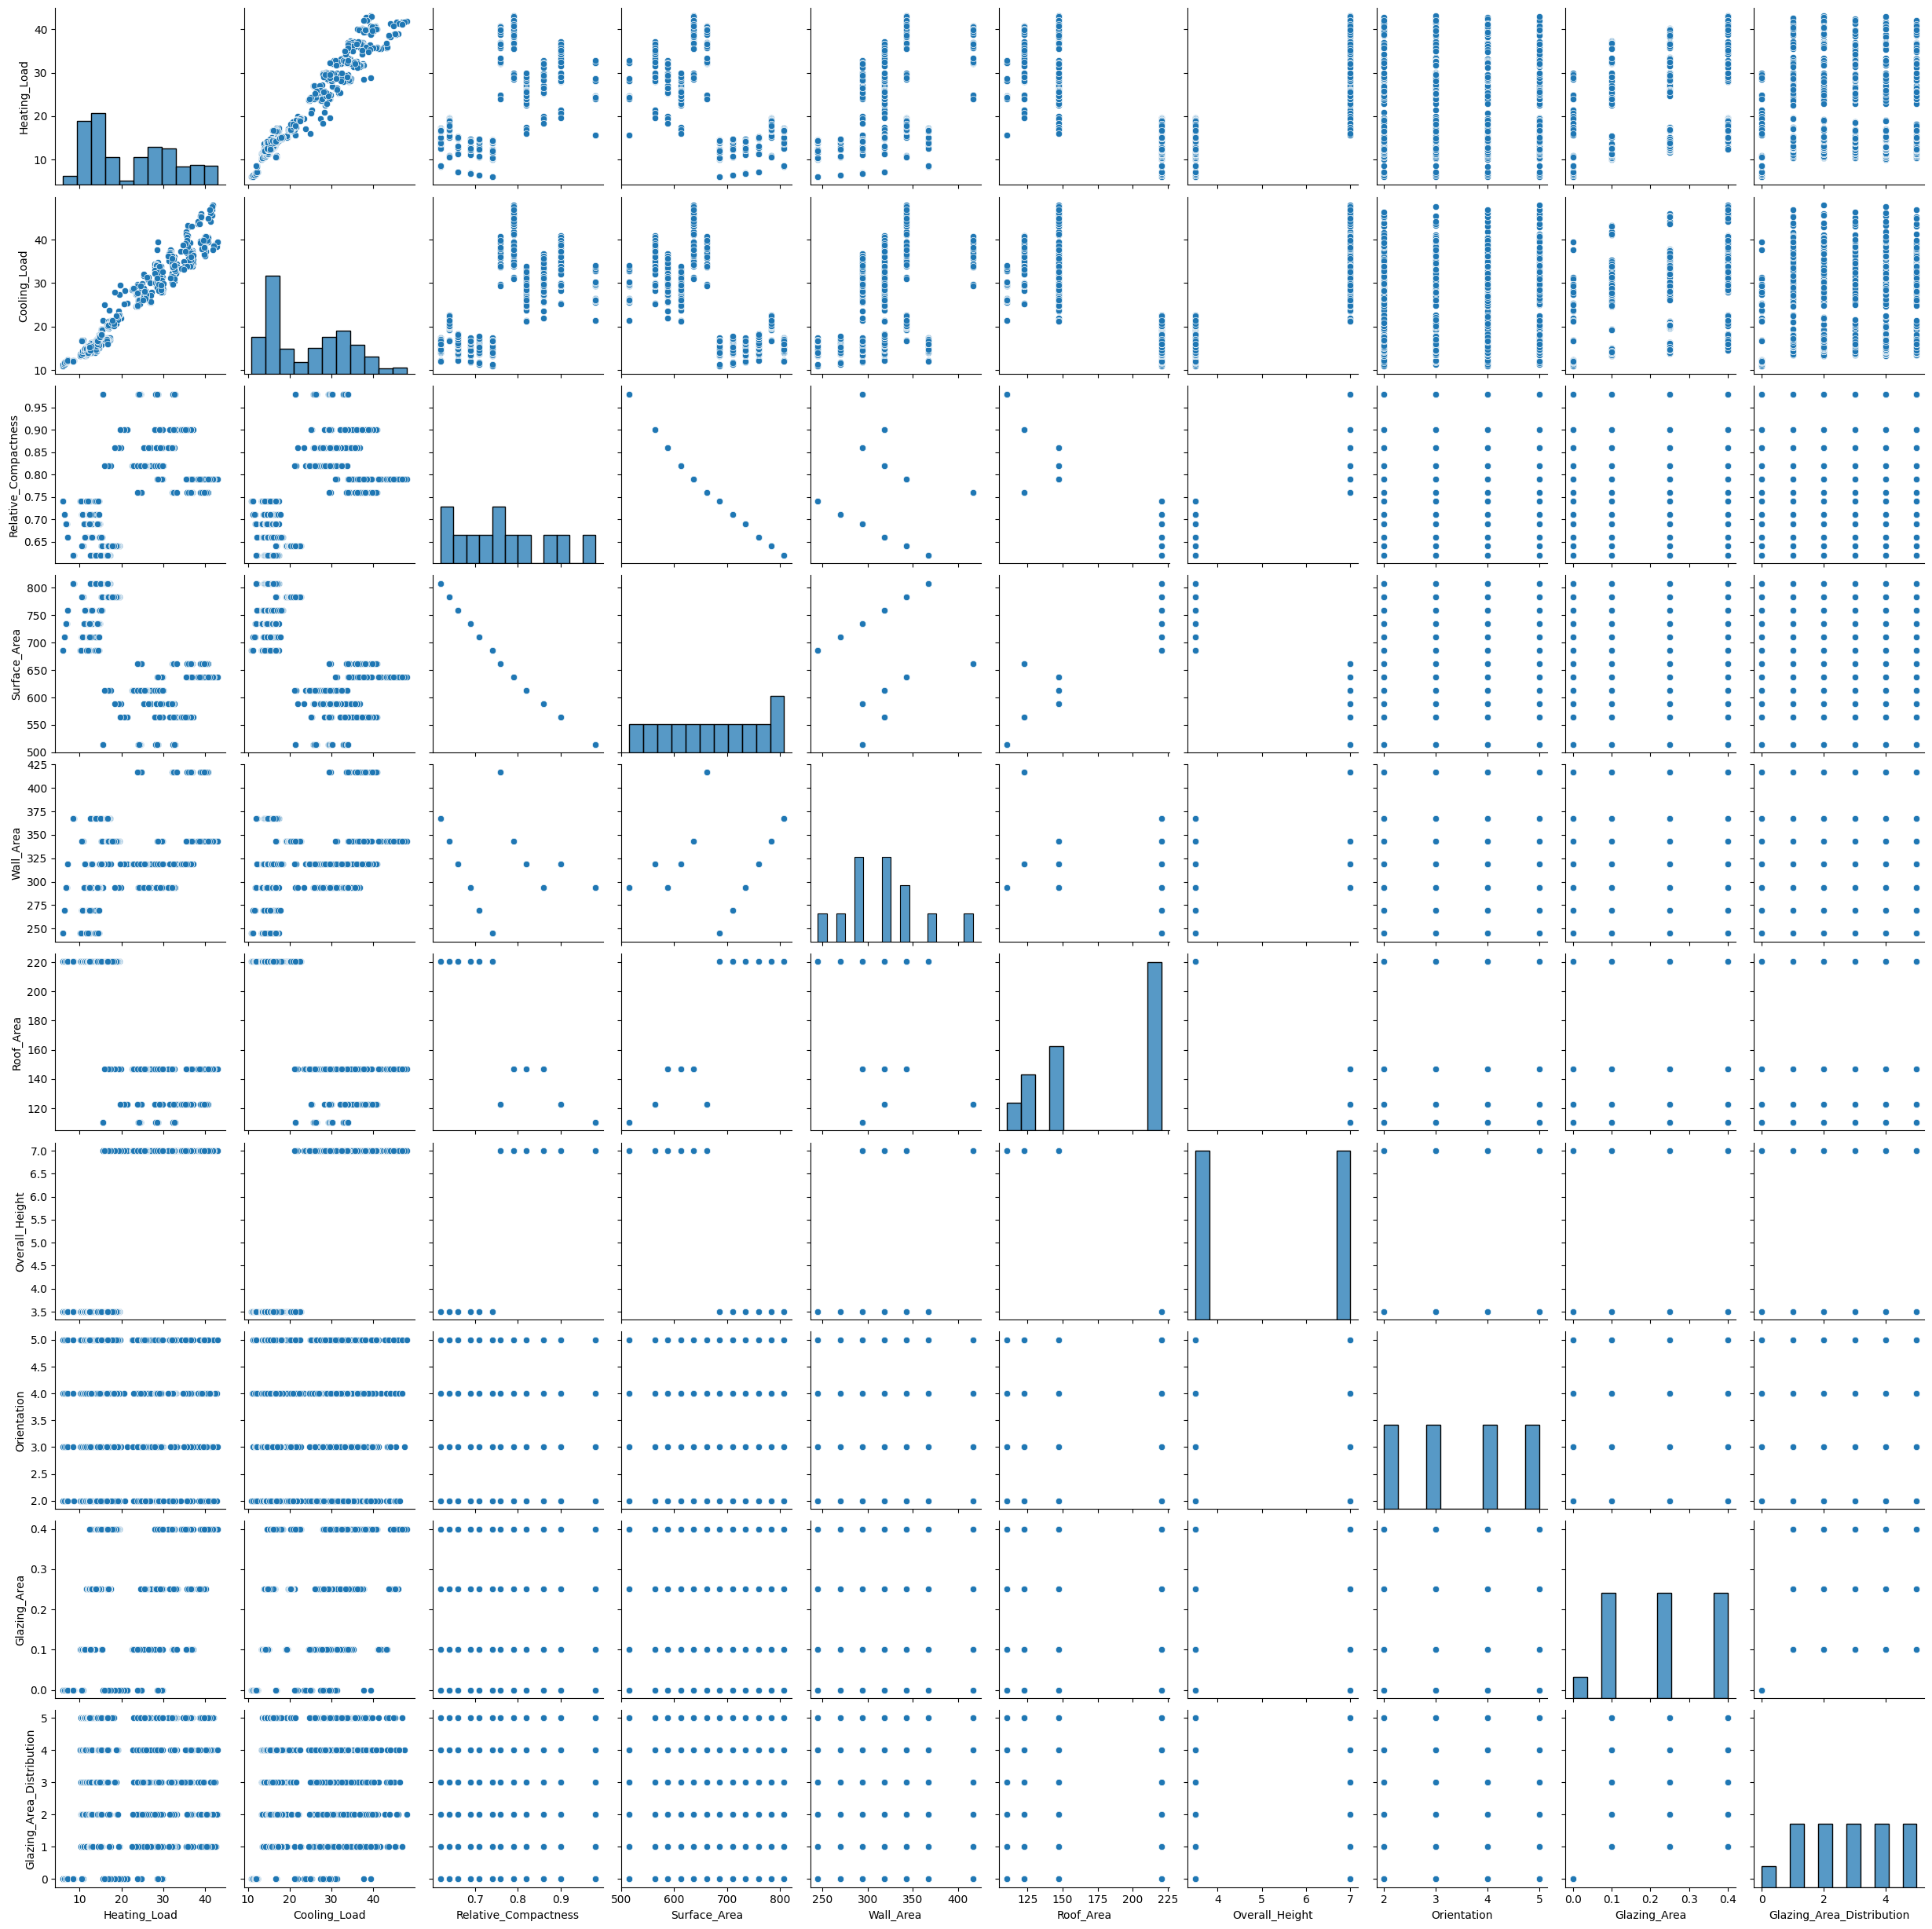

In [ ]:

sns.pairplot(df[['Heating_Load', 'Cooling_Load'] + df.columns[:8].tolist()])
plt.show()


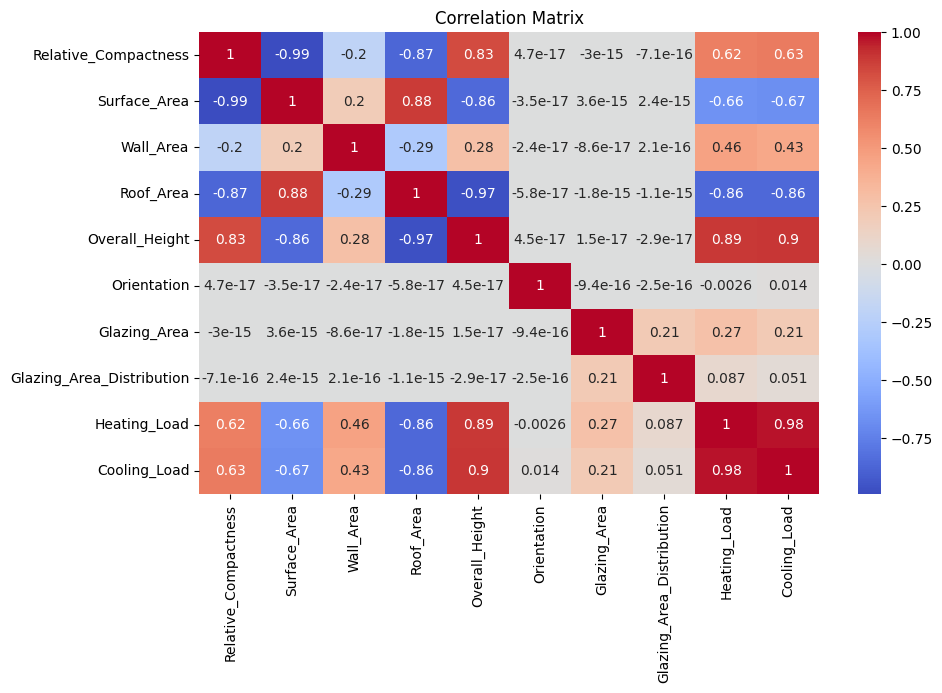

In [ ]:
# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# we have 2 target values (heat , cool)

X = df.iloc[:, :8]
y_heat = df['Heating_Load']
y_cool = df['Cooling_Load']

In [ ]:
# split in train test ratio

X_train, X_test, y_train, y_test = train_test_split(X, y_heat, test_size=0.2, random_state=42)

Train For Heating - Linear Regression Model



In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Evaluate

R² Score: 0.9121846294352439
MSE: 9.15320764594167


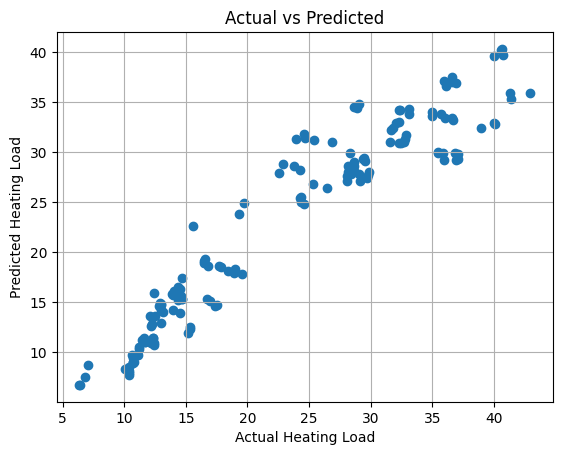

In [ ]:
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# Plot predictions
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Heating Load")
plt.ylabel("Predicted Heating Load")
plt.title("Actual vs Predicted")
plt.grid()
plt.show()


Regularization - Ridge

In [ ]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
print("Ridge R²:", r2_score(y_test, ridge.predict(X_test)))

Ridge R²: 0.9073852563091276


In [ ]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=["Coefficient"])
print(coeff_df)

                           Coefficient
Relative_Compactness        -61.873354
Surface_Area                 -0.060105
Wall_Area                     0.037553
Roof_Area                    -0.048829
Overall_Height                4.123669
Orientation                  -0.032439
Glazing_Area                 20.143192
Glazing_Area_Distribution     0.211103


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y_heat, cv=5, scoring='r2')
print("Cross-validated R²:", scores.mean())

Cross-validated R²: 0.890291010420111


Train For Cooling - Linear Regression Model

In [ ]:
# split in train test ratio

x_train, x_test, Y_train, Y_test = train_test_split(X, y_heat, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(x_train, Y_train)
Y_pred = model.predict(x_test)

Cooling R² Score: 0.9121846294352439
Cooling MSE: 9.15320764594167


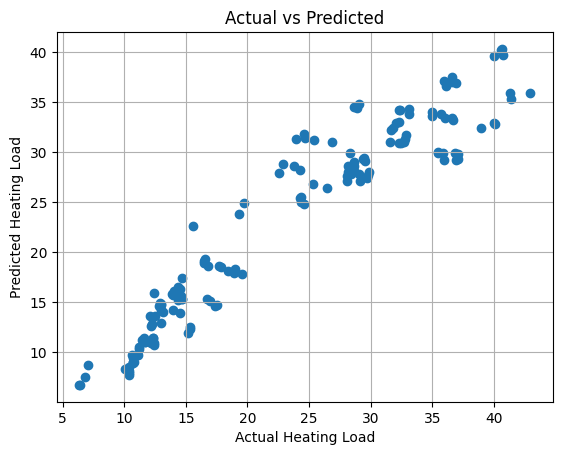

In [ ]:
print("Cooling R² Score:", r2_score(Y_test, Y_pred))
print("Cooling MSE:", mean_squared_error(Y_test, Y_pred))

# Plot predictions
plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual Heating Load")
plt.ylabel("Predicted Heating Load")
plt.title("Actual vs Predicted")
plt.grid()
plt.show()


Regularization - Lasso

In [24]:

lasso = Lasso(alpha=1.0)
lasso.fit(x_train, Y_train)
print("Lasso R²:", r2_score(Y_test, lasso.predict(x_test)))

Lasso R²: 0.7940640329060296


In [25]:
scores = cross_val_score(model, X, y_cool, cv=5, scoring='r2')
print("Cross-validated R²:", scores.mean())

Cross-validated R²: 0.8752411965792662
